In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

In [3]:
import numpy as np
from sklearn.decomposition import PCA

In [4]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2], [4, 3], [4, -1]])

In [5]:
X

array([[-1, -1],
       [-2, -1],
       [-3, -2],
       [ 1,  1],
       [ 2,  1],
       [ 3,  2],
       [ 4,  3],
       [ 4, -1]])

In [6]:
import matplotlib.pyplot as plt

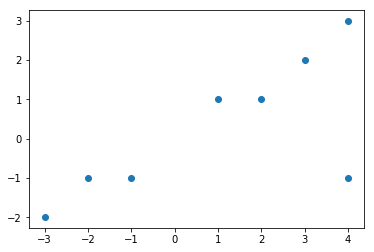

In [7]:
plt.scatter(X[:, 0], X[:, 1])

## First step in PCA: Scale

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [10]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
scaler.mean_

array([1.  , 0.25])

In [12]:
scaler.var_

array([6.5   , 2.6875])

In [13]:
X_scaled = scaler.transform(X)

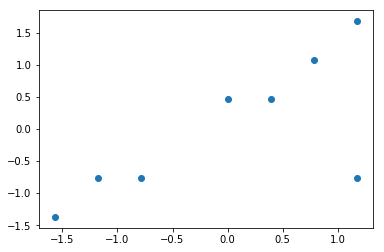

In [14]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1])

## Second step: Find linear correlations and their eigenvectors

In [15]:
import pandas as pd

In [16]:
df = pd.DataFrame(X_scaled)

In [17]:
corr_mat = df.corr()

In [18]:
corr_mat

,0,1
0,1.000000,0.717778
1,0.717778,1.000000


In [19]:
import seaborn as sns

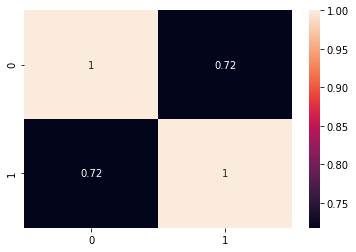

In [20]:
sns.heatmap(corr_mat, annot=True)

In [21]:
eig_vals, eig_vecs = np.linalg.eig(corr_mat)

In [22]:
eig_vecs

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

## Eigenvectors on the correlation matrix which will be the principal components

In [23]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [24]:
pca.explained_variance_

array([9.3121762, 1.1878238])

In [25]:
# sum is 1, first pc has a very high variance, i.e. is very good, second could be deleted
pca.explained_variance_ratio_

array([0.88687392, 0.11312608])

In [26]:
X_reduced = pca.transform(X)

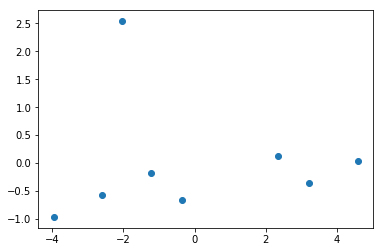

In [27]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1])